# More probability theory

**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

## Covariance and correlation








### Functional dependence of random variables

If two random variables $X$ and $Y$ are _not_ [independent](independence), then (naturally) they are called _dependent_. Though our goal in this chapter is to study a _particular type_ of dependence between random variables, I think it will benefit us by first discussing dependence in general.

A natural source of examples of dependent random variables are those which are *functionally* dependent in the sense of the following theorem:

```{prf:theorem} Functional dependence $\Rightarrow$ dependence

Let $X$ and $Y$ be random variables. If $Y = h(X)$ for some function $h:\mathbb{R} \to \mathbb{R}$, then $X$ and $Y$ are dependent.
```

In order to prove this, we need to make the (mild) assumption that there is an event $B\subset \mathbb{R}$ with

$$
0<P(Y\in B)<1.
$$ (middle-eqn)

In this case, we set $A = f^{-1}(B)^c$ and observe that

$$
P(X\in A, \ Y\in B) = P(\emptyset) =0.
$$

On the other hand, we have

$$
P(X\in A) = 1 - P(Y\in B),
$$

and so

$$
P(X\in A) P(Y\in B) = (1 - P(Y\in B))P(Y\in B) \neq 0
$$

by {eq}`middle-eqn`. But then

$$
P(X\in A, \ Y\in B) \neq P(X\in A) P(Y\in B),
$$

which proves $X$ and $Y$ are dependent.

What does a pair of functionally dependent random variables look like? For an example, let's suppose that

$$
X \sim \mathcal{N}(1,0.5^2) \quad \text{and} \quad Y = h(X) = X(X-1)(X-2).
$$

Then, let's simulate a draw of 1000 samples from $X$, toss them into

$$
h(x) = x(x-1)(x-2)
$$

to obtain the associated $y$-values, and then produce a scatter plot:

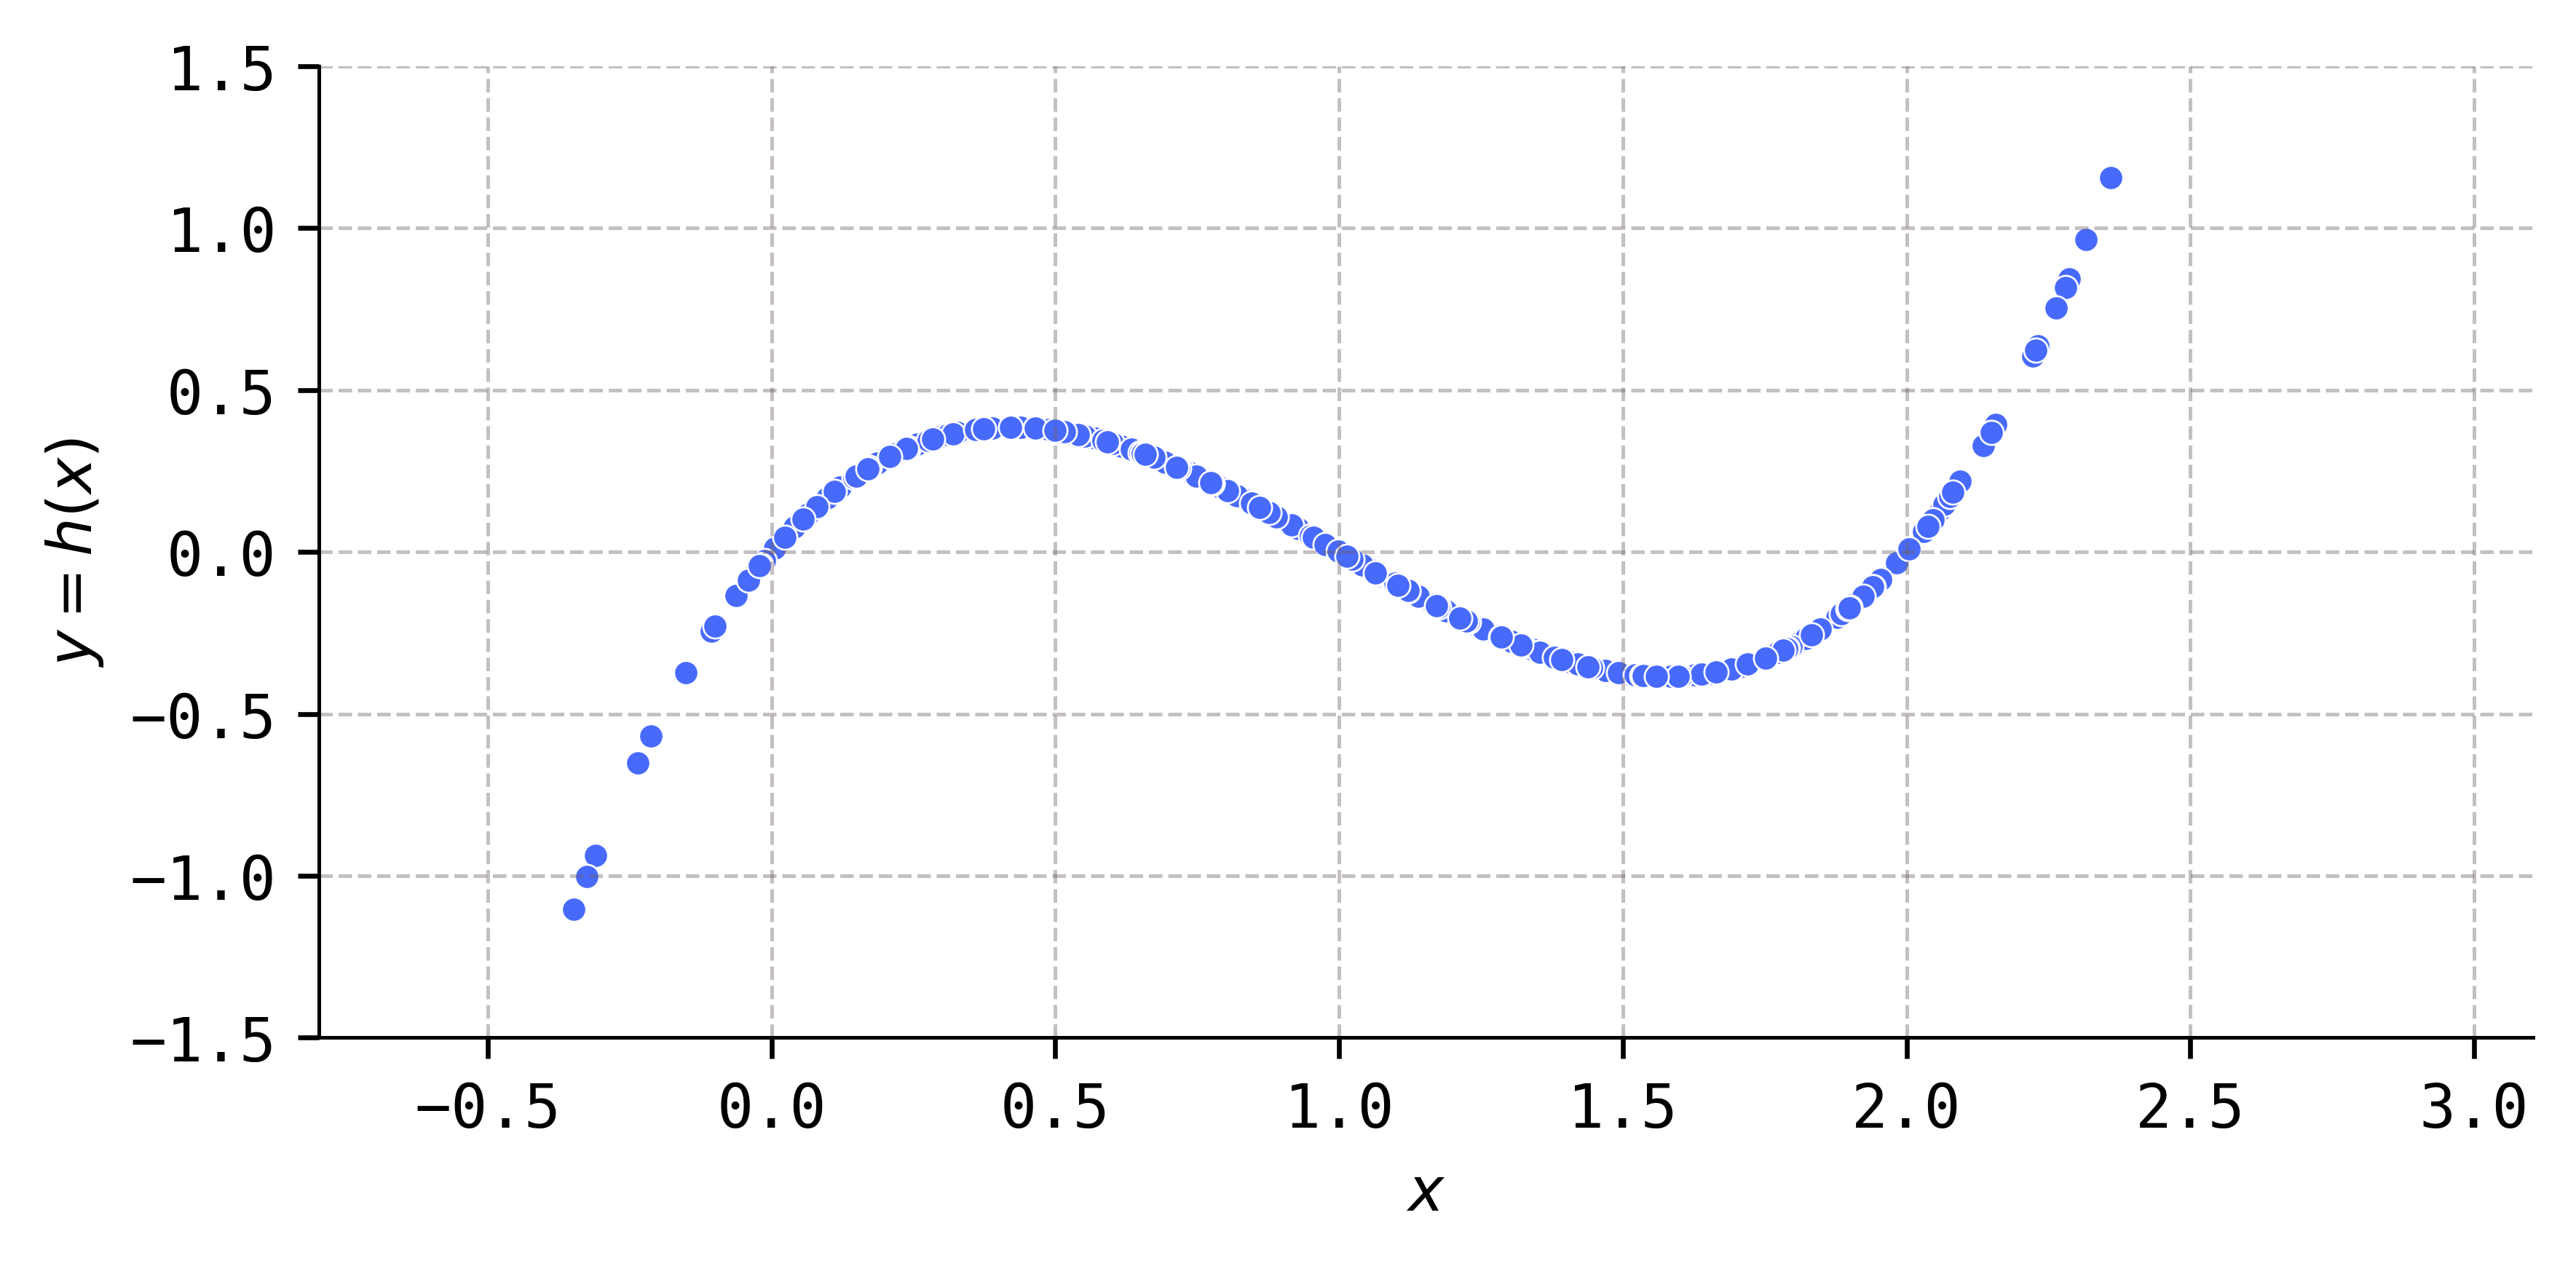

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import pandas as pd
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
mpl.rcParams['figure.dpi'] = 600
warnings.filterwarnings("ignore")

np.random.seed(42)

def h(x):
    return x * (x - 1) * (x - 2)

x = sp.stats.norm.rvs(loc=1, scale=0.5, size=1000)
y = h(x)

sns.scatterplot(x=x, y=y)
plt.xlabel('$x$')
plt.ylabel('$y=h(x)$')
plt.ylim(-1.5, 1.5)
plt.gcf().set_size_inches(w=6, h=3)
plt.tight_layout()

The plot looks exactly like we would expect: A bunch of points lying on the graph of the function $y=h(x)$.

However, very often with real-world data, an **exact** functional dependence $Y = h(X)$ does not truly hold. Instead, the functional relationship is "noisy", resulting in scatter plots that look like this:

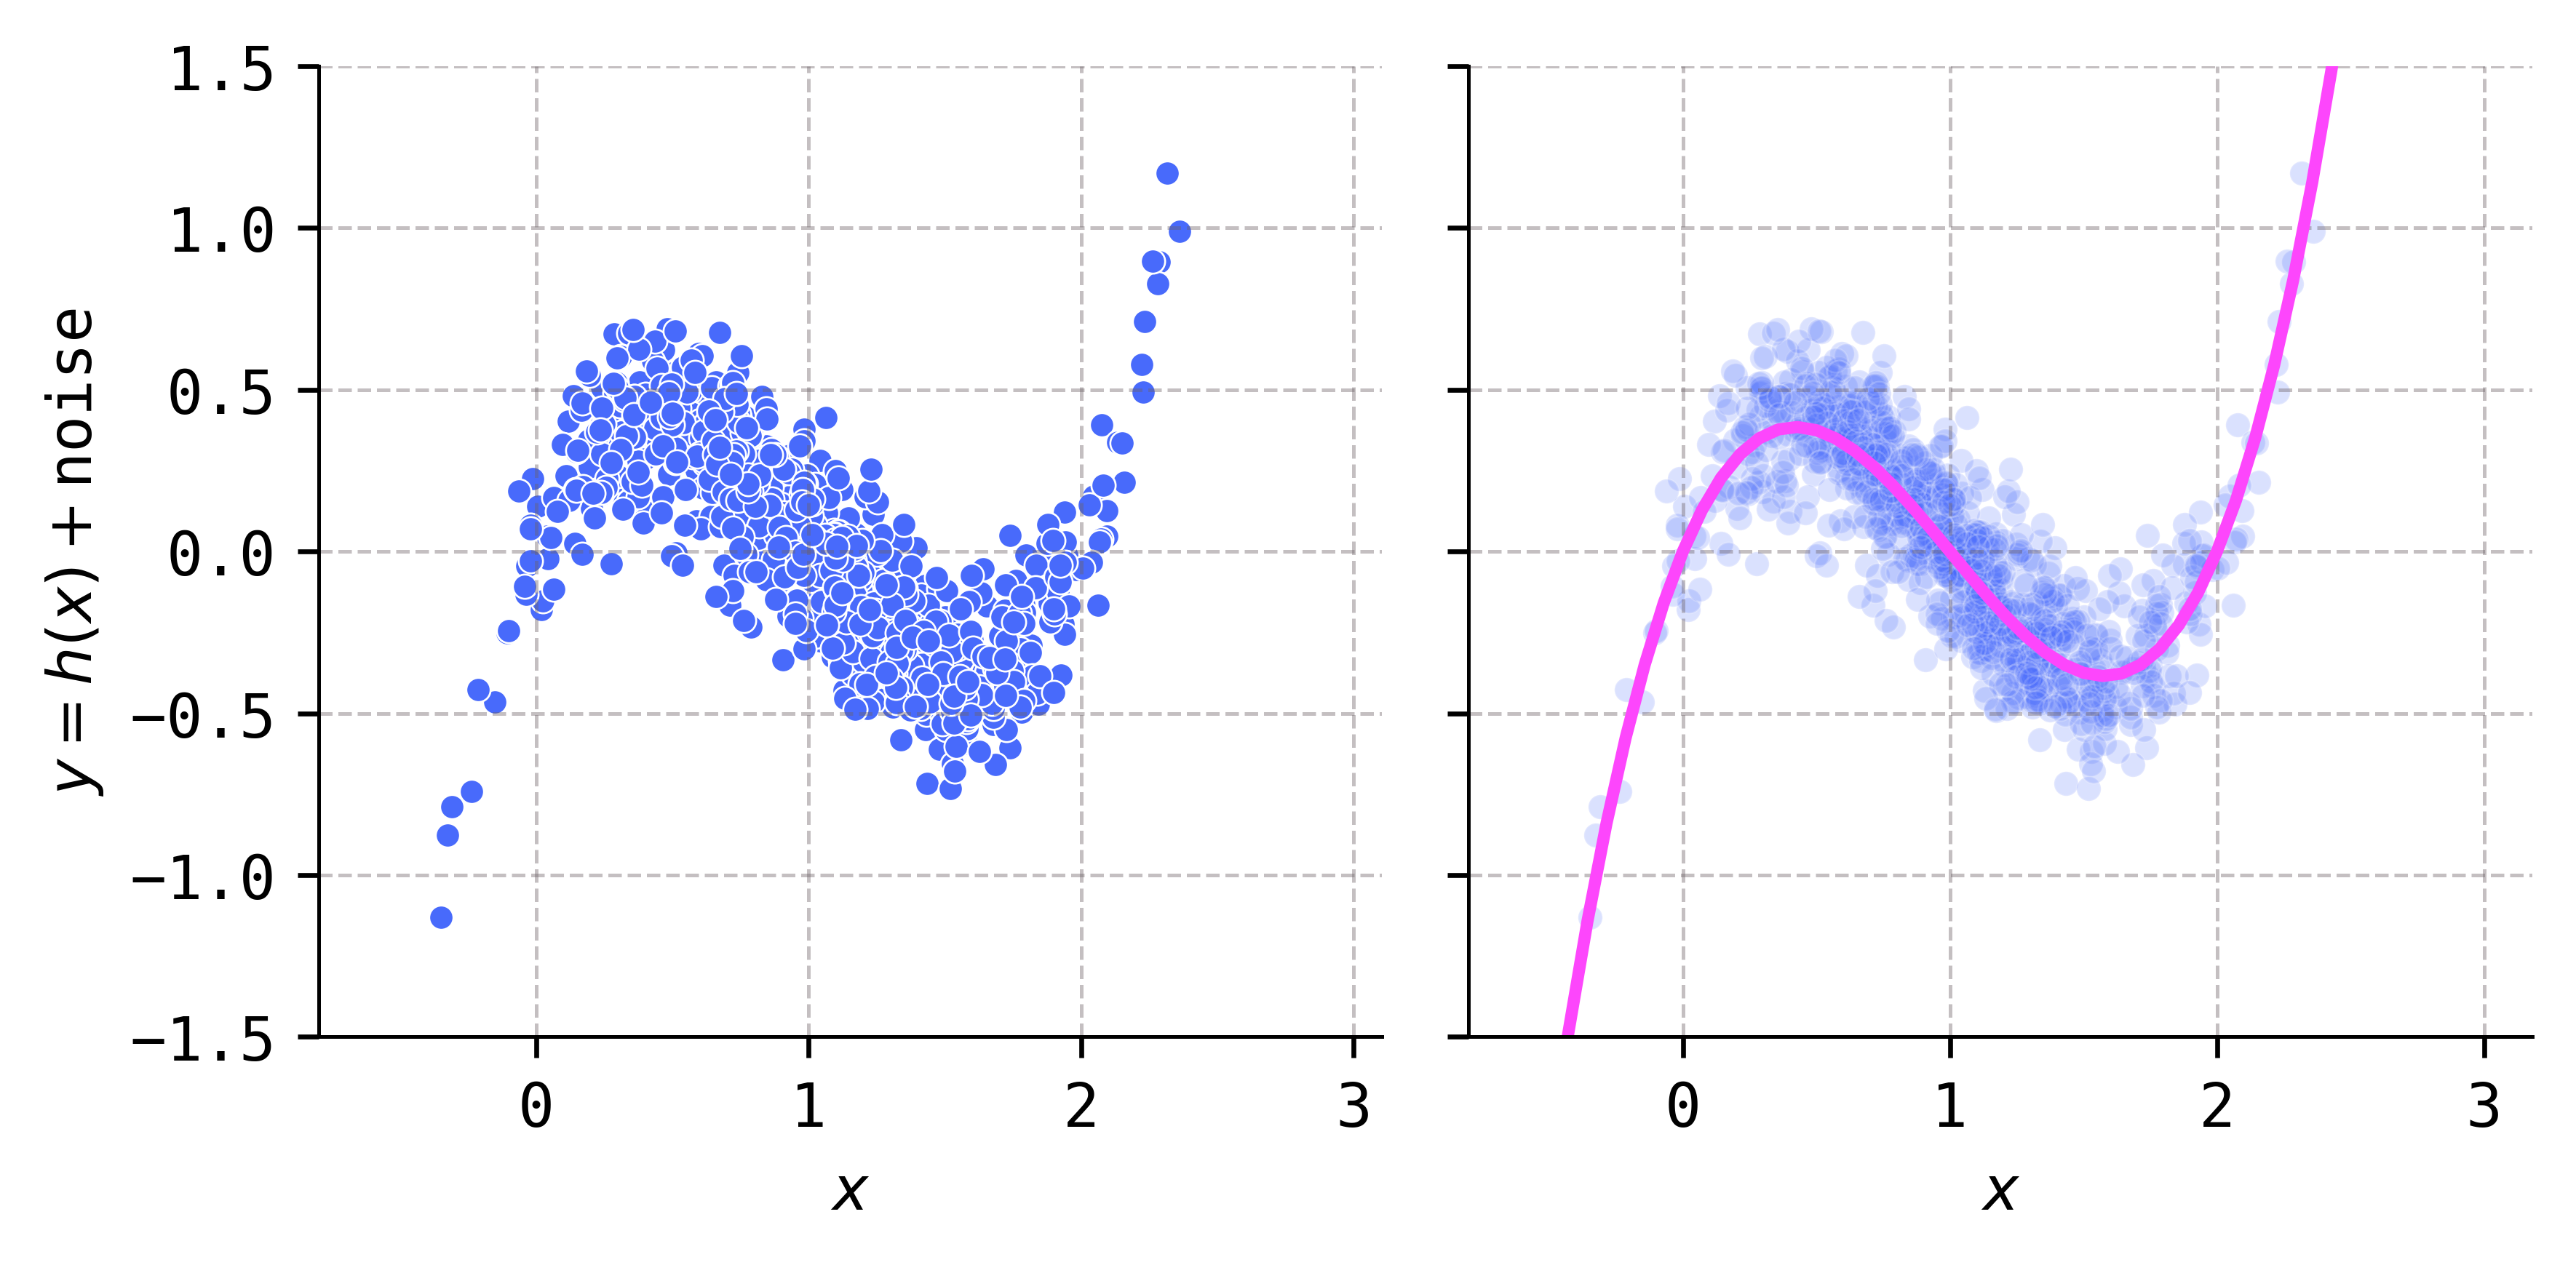

In [2]:
epsilon = sp.stats.norm.rvs(scale=0.15, size=1000)
grid = np.linspace(-0.5, 3)

_, ax = plt.subplots(ncols=2, figsize=(6, 3), sharey=True)

sns.scatterplot(x=x, y=y + epsilon, ax=ax[0])
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y=h(x) + $noise')

sns.scatterplot(x=x, y=y + epsilon, alpha=0.2, ax=ax[1])
ax[1].plot(grid, h(grid), color='#FD46FC')
ax[1].set_xlabel('$x$')

plt.tight_layout()

The "noisy" functional relationship is drawn in the left-hand plot, while on the right-hand plot I have superimposed the graph of the function $y=h(x)$ for reference. Instead of lying directly on the graph of $y=h(x)$, the data is clustered along the graph.

The goal in this chapter is to study "noisy" _linear_ dependencies between random variables; relationships that look like these:

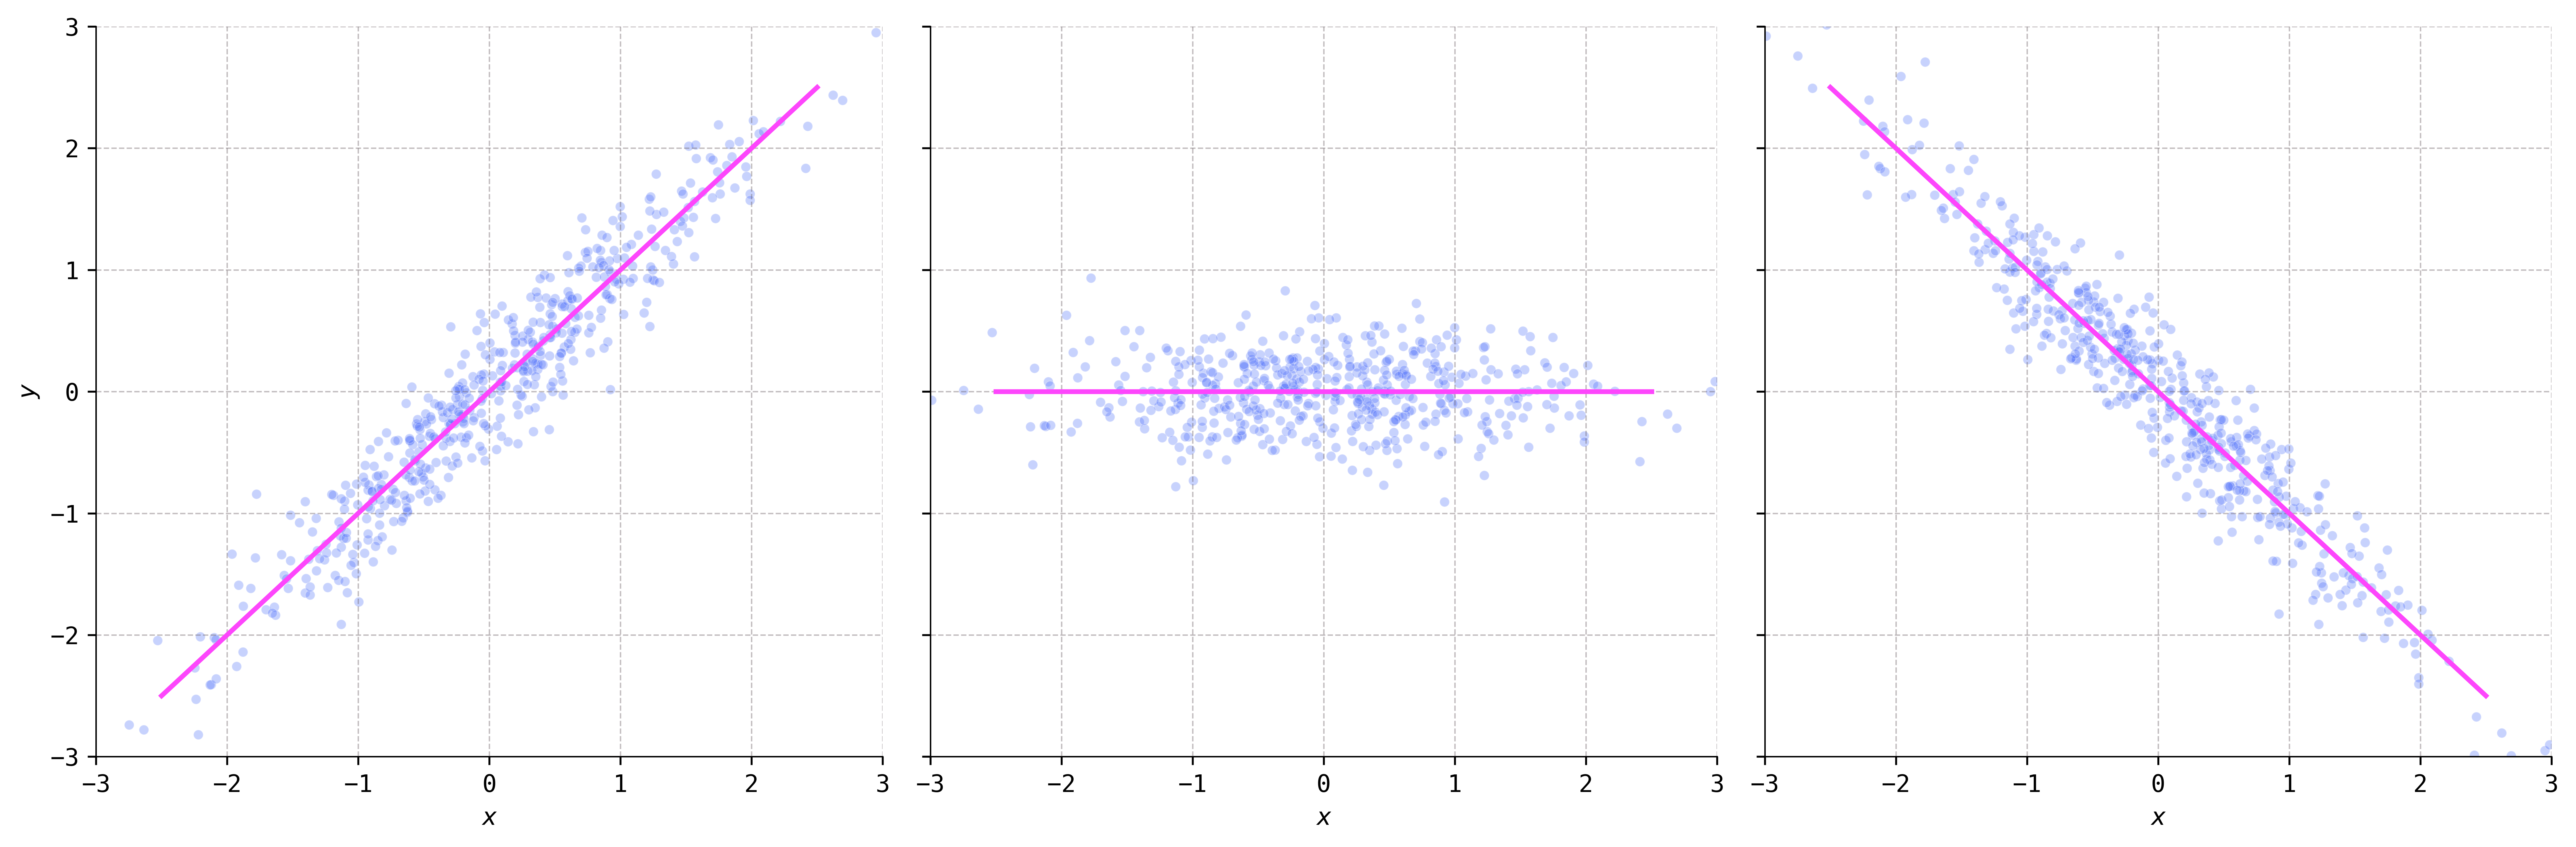

In [3]:
grid = np.linspace(-2.5, 2.5)
epsilon = sp.stats.norm.rvs(scale=0.3, size=500)
m = [1, 0, -1]
x = sp.stats.norm.rvs(size=500)
_, ax = plt.subplots(ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i, m in enumerate(m):
    y = m * x + epsilon
    sns.scatterplot(x=x, y=y, ax=ax[i], alpha=0.3)
    ax[i].plot(grid, m * grid, color='#FD46FC')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')

plt.tight_layout()

We have already seen scatter plots like this before! Indeed, recall Ames housing dataset from the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) and the [beginning](motivation) of the previous chapter consisting of pairs

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_{2{,}930},y_{2{,}930}),
$$

where $x_i$ is the area of the $i$-th house (in ft$^2$) and $y_i$ is the selling price (in $1k). This was the scatter plot of the data, with a straight line superimposed for reference:

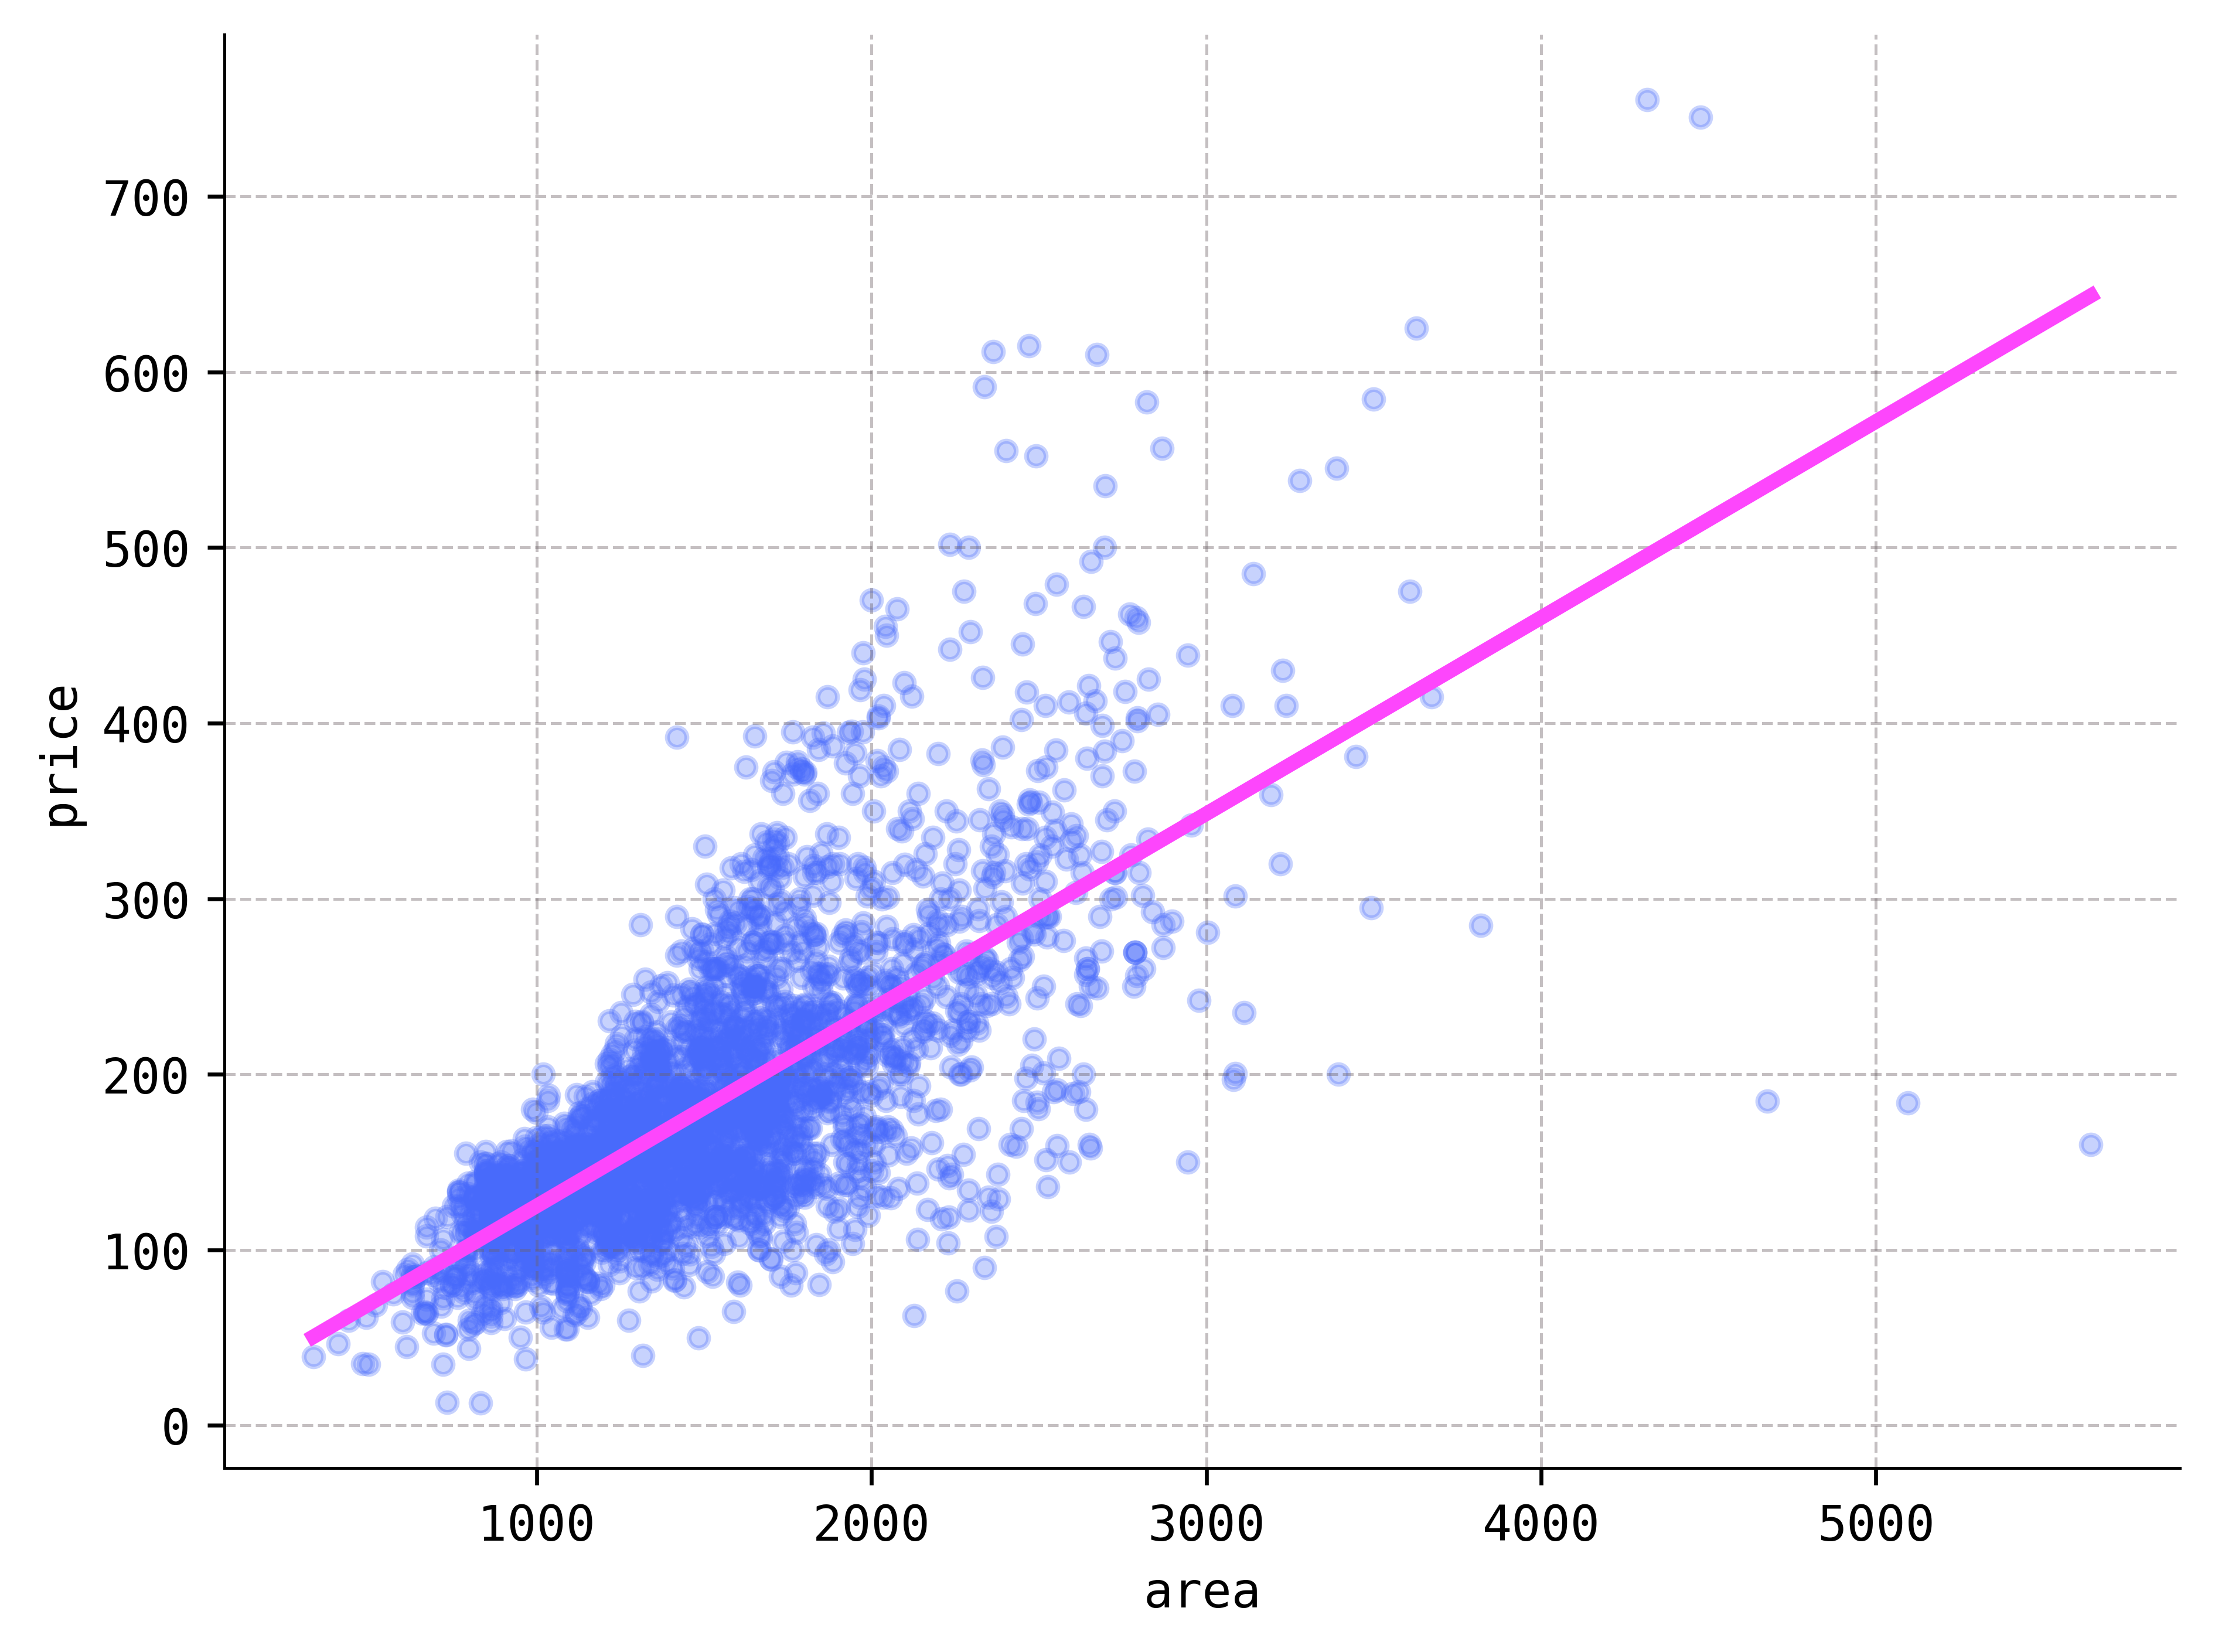

In [4]:
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

sns.regplot(data=df, x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'})
plt.xlabel('area')
plt.ylabel('price')
plt.tight_layout()

```{margin}

The line in this plot that the data clusters along is called the _linear-regression line_. We will study these in {numref}`Chapters %s <prob-models>` and {numref}`%s <lin-reg>`.
```

There appears to be a "noisy" linear dependence between the size of a house $X$ and its selling price $Y$. Moreover, the line that the data naturally clusters along has positive slope, which indicates that as the size of a house increases, its selling price tends to increase as well.

Our goal in this section of the chapter is to uncover ways to _quantify_ or _measure_ the strength of "noisy" linear dependencies between random variables. We will discover that there are two such measures: _Covariance_ and _correlation_.









### Covariance

The definition of _covariance_ is based on the following pair of basic observations:

> 1. If the observed values of two random variables $X$ and $Y$ cluster along a line of _positive_ slope, then $x$ and $y$ in a data point $(x,y)$ tend to be large (and small) at the same time.
> 2. If the observed values of two random variables $X$ and $Y$ cluster along a line of _negative_ slope, then a large value $x$ tends to be paired with a small value $y$ in a data point $(x,y)$, while a small value of $x$ tends to be paired with a large value $y$.

In order to make something useful from these observations, it is convenient to "center" the dataset by subtracting off the means:

$$
X \xrightarrow{\text{replace with}} X - \mu_X \quad \text{and} \quad Y \xrightarrow{\text{replace with}} Y - \mu_Y.
$$

Notice that

$$
E(X - \mu_X) = E(X) - E(\mu_X) = 0,
$$

and similarly $E(Y-\mu_Y) = 0$, so that when we carry out these replacements, we get random variables with mean $0$. If we center the housing data by subtracting the means and then plot, we get this:

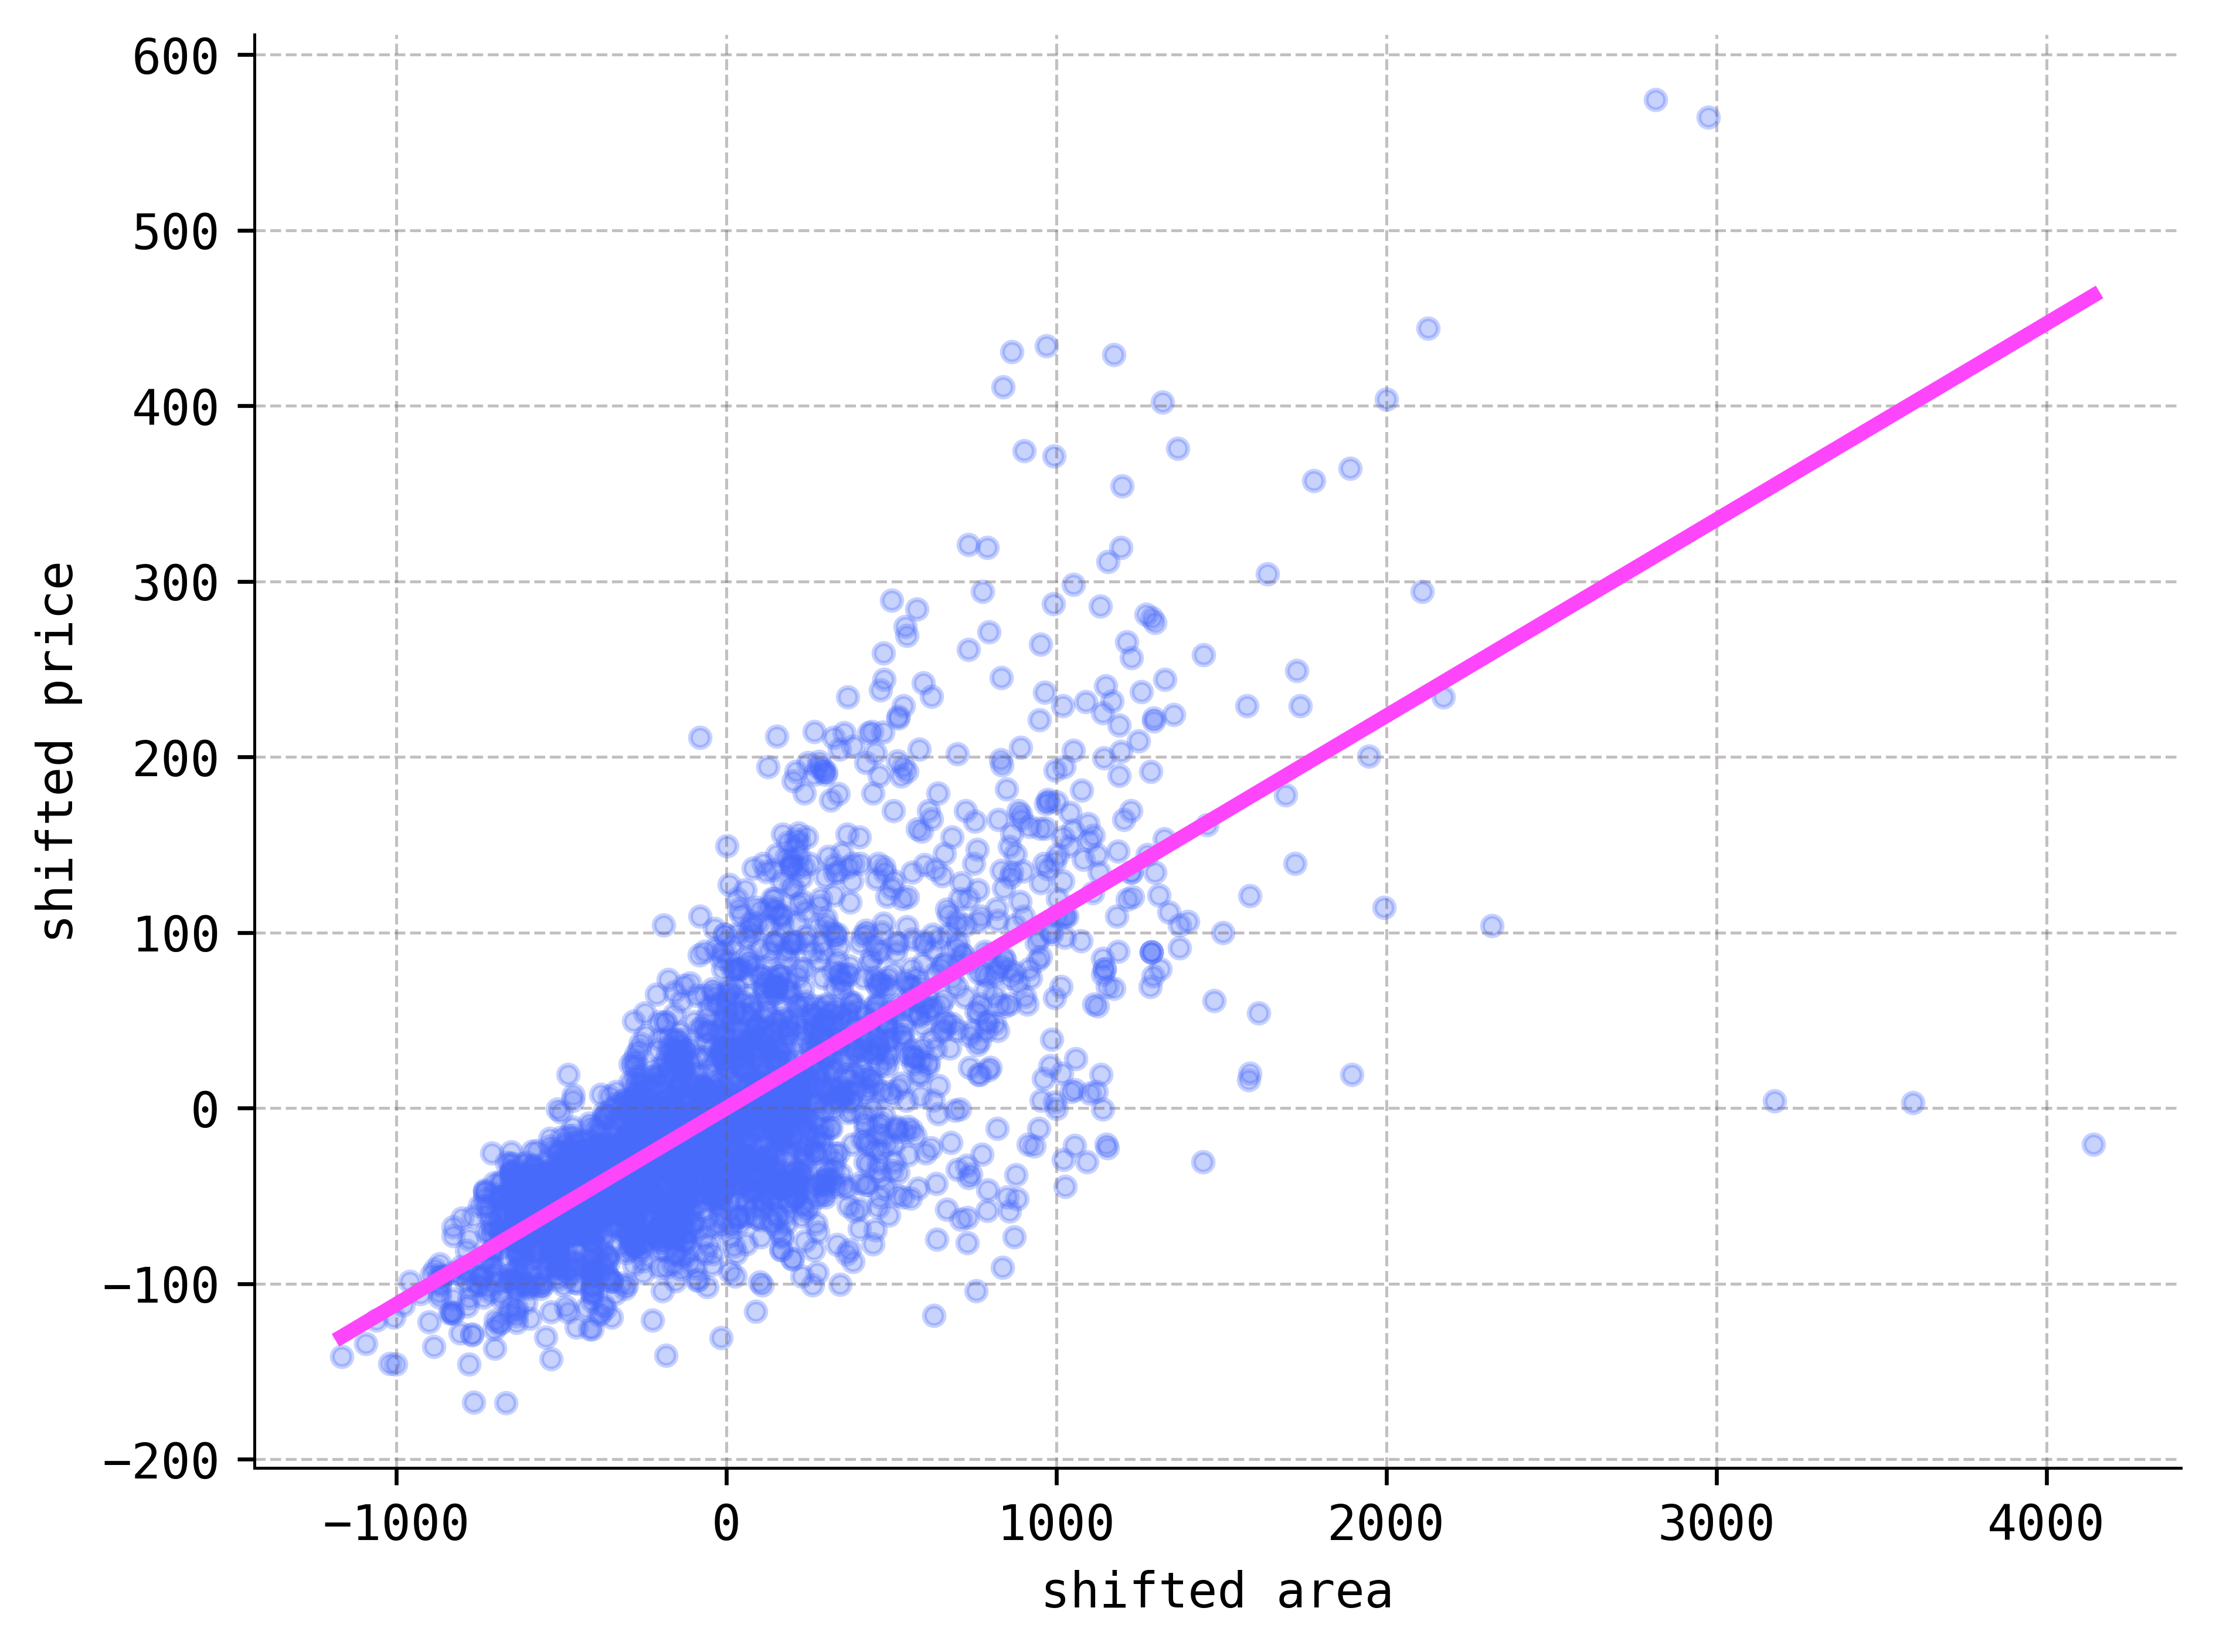

In [5]:
sns.regplot(data=df - df.mean(), x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'})
plt.xlabel('shifted area')
plt.ylabel('shifted price')
plt.tight_layout()

You can see that the dataset has not changed its shape---it has only shifted so that its "center" is at the origin $(0,0)$.

The reason that we "center" the data is because it allows us to conveniently rephrase our observations above in terms of signs:

> 1. If the observed values of two **centered** random variables $X$ and $Y$ cluster along a line of _positive_ slope, then $x$ and $y$ in a data point $(x,y)$ tend to have the same sign, i.e., $xy>0$.
> 2. If the observed values of two **centered** random variables $X$ and $Y$ cluster along a line of _negative_ slope, then $x$ and $y$ in a data point $(x,y)$ tend to have opposite signs, i.e., $xy < 0$.

Essentially, the next definition takes the average value of the product $xy$, as $(x,y)$ ranges over observed pairs of values of a pair $(X,Y)$ of **centered** random variables. If this average value is positive, it suggests a (noisy) linear dependence with positive slope; if it is negative, it suggests a (noisy) linear dependence with negative slope. A larger average (in either direction---positive or negative) tends to indicate a *stronger* dependency. If the random variables are not centered, then we subtract off their means before computing the product and taking its average value.

```{prf:definition}

Let $X$ and $Y$ be two random variables with expectations $\mu_X = E(X)$ and $\mu_Y = E(Y)$. The _covariance_ of $X$ and $Y$, denoted either by $\sigma(X,Y)$ or $\sigma_{XY}$, is defined via the equation

$$
\sigma_{XY} = E \left[ (X-\mu_X)(Y-\mu_Y) \right].
$$
```

Notice that the covariance of a random variable $X$ with itself is exactly its variance:

$$
\sigma_{XX} = E \left[ (X-\mu_X)^2\right] = V(X).
$$

Before we look at examples, it will be convenient to state and prove the following:

```{prf:theorem} Shortcut Formula for Covariance
:label: shortcut-covar-thm


Let $X$ and $Y$ be two random variables. Then

$$
\sigma_{XY} = E(XY) - E(X) E(Y).
$$
```

The proof is a triviality, given all the properties that we already know about expectations:

\begin{align*}
\sigma_{XY} &= E\left(XY - \mu_Y X - \mu_X Y + \mu_X \mu_Y \right) \\
&= E(XY) - 2\mu_X\mu_Y + \mu_X\mu_Y \\
&= E(XY) - E(X) E(Y).
\end{align*}

Now, armed with this formula, let's do some problems:

```{admonition} Problem Prompt

Do problems 1 and 2 on the worksheet.
```

A pair of very useful properties of covariance are listed in the following:

```{prf:theorem} Covariance = symmetric bilinear form
:label: bilinear-thm

1. _Symmetry_. If $X$ and $Y$ are random variables, then $\sigma_{XY} = \sigma_{YX}$.

2. _Bilinearity_. Let $X_1,\ldots,X_m$ and $Y_1,\ldots,Y_n$ be sequences of random variables, and $a_1,\ldots,a_m$ and $b_1,\ldots,b_n$ sequences of real numbers. Then:
    
    $$
    \sigma\Big( \sum_{i=1}^m a_i X_i, \sum_{j=1}^n b_j Y_j\Big) = \sum_{i=1}^m \sum_{j=1}^n a_i b_j \sigma(X_i,Y_j).
    $$ (bilinear-eqn)

```

I suggest that you prove these properties on your own. The proof of symmetry is more or less trivial, while the proof of bilinearity may be established first by proving the special case

$$
\sigma\Big( \sum_{i=1}^m a_i X_i, Y\Big) = \sum_{i=1}^m a_i \sigma(X_i,Y)
$$

by induction on $m$. Then, use this special case and symmetry to obtain the general result {eq}`bilinear-eqn`.

Bilinearity of covariance allows us to generalize {prf:ref}`var-affine-thm` on the variance of an affine transformation of a random variable:

```{prf:theorem} Variance of a linear combination
:label: variance-lin-combo-thm

Let $X_1,\ldots,X_m$ be a sequence of random variables and $a_1,\ldots,a_m$ a sequence of real numbers. Then:

$$
V(a_1X_1 + \cdots + a_m X_m) = \sum_{i=1}^m a_i^2 V(X_i) + 2\sum_{1 \leq i < j \leq m }a_ia_j \sigma(X_i,X_j).
$$
```

The proof is an application of bilinearity of covariance:

\begin{align*}
V(a_1X_1 + \cdots + a_m X_m) &= \sigma\Big(\sum_{i=1}^m a_i X_i, \sum_{j=1}^m a_j X_j \Big)  \\
&= \sum_{i,j=1}^m a_i a_j \sigma(X_i,X_j) \\
&= \sum_{i=1}^m a_i^2 V(X_i) + 2\sum_{1 \leq i < j \leq m }a_ia_j \sigma(X_i,X_j).
\end{align*}

In particular, we see that if $\sigma(X_i,X_j)=0$ for all $i\neq j$ (i.e., if the random variables are pairwise _uncorrelated_; see below), the formula simplifies to:

$$
V(a_1X_1 + \cdots + a_m X_m) = \sum_{i=1}^m a_i^2 V(X_i).
$$



### Correlation


While the signs of covariances are significant, their precise numerical values may be less so. One reason for this is that covariances are unbounded, in the sense that they may take any value from $-\infty$ to $+\infty$. They are also sensitive to the scales on which the variables are measured. For example, in the housing dataset that we considered in the previous section, suppose that $Z$ represents the size of a house measured in _hundreds_ of square feet; then $X$ and $Z$ are related via the equation $Z = X/100$. But then, according to {prf:ref}`bilinear-thm`, we have

$$
\sigma_{ZY} = \frac{1}{100} \sigma_{XY},
$$

so the covariance between $X$ and $Y$ is _different_ from the covariance between $Z$ and $Y$. The fact that covariances are unbounded and sensitive to scale means that the precise values of covariances can be hard to interpret.

The remedy is to define a "normalized" measure of linear dependence:

```{prf:definition}

Let $X$ and $Y$ be two random variables. The _correlation_ of $X$ and $Y$, denoted by either $\rho(X,Y)$ or $\rho_{XY}$, is defined via the equation

$$
\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}.
$$
```

The key properties of correlation are given in the following:

```{prf:theorem} Properties of correlation

Let $X$ and $Y$ be random variables.

1. _Symmetry_. We have $\rho_{XY} = \rho_{YX}$.

2. _Scale invariance_. If $a$ is a nonzero real number, then

    $$
    \rho(aX, Y) = \begin{cases}
    \rho(X, Y) & : a>0, \\
    -\rho(X, Y) & : a <0.
    \end{cases}
    $$

3. _Normalization_. We have $|\rho(X,Y)| \leq 1$.
```

The symmetry property of correlation follows from the same property of covariance in {prf:ref}`bilinear-thm`. Scale invariance follows from bilinearity of covariance, as well as the equality $\sigma_{aX} = |a| \sigma_X$ established in {prf:ref}`var-affine-thm` (or its generalization {prf:ref}`variance-lin-combo-thm`). The proof of normalization is a bit more involved but still not very difficult. It requires the Cauchy-Schwarz inequality; see the proof in Section 4.6 of {cite}`DeGrootSchervish2014`, for example.

Remember, covariance and correlation were cooked up to measure linear dependencies between random variables. We wonder, then, what is the correlation between two random variables that are _perfectly_ linearly dependent? Answer:

```{prf:theorem}

Let $X$ be a random variable and $a$ and $b$ constants with $a\neq 0$. Then

$$
\rho(X,aX+b) = \begin{cases}
1 & : a>0, \\
-1 & : a < 0.
\end{cases}
$$
```

The proof is a simple computation, similar to the proof of scale invariance from above:

$$
\rho(X,aX+b) = \frac{a\sigma(X,X)+\sigma(X,b)}{\sigma_X\sigma_{aX+b}} = \frac{a V(X)}{\sqrt{V(X)}\sqrt{a^2V(X)}} = \frac{a}{|a|}.
$$

We give a name to two random variables whose correlation is zero:

```{prf:definition}

If $X$ and $Y$ are two random variables with $\rho(X,Y)=0$, then we say $X$ and $Y$ are _uncorrelated_. Otherwise, they are said to be _(linearly) correlated_.
```

You should think of independence as a strong form of uncorrelated-ness. This is the content of the first part of the following result:

```{prf:theorem} Dependence and correlation

Let $X$ and $Y$ be random variables.

1. If $X$ and $Y$ are independent, then they are uncorrelated.

2. However, there exist dependent $X$ and $Y$ that are uncorrelated.
```

The proof of the first statement is a simple application of {prf:ref}`ind-expect-thm` from below and the Shortcut Formula for Covariance in {prf:ref}`shortcut-covar-thm`. Indeed, we have

$$
\sigma_{XY} = E(XY) - E(X)E(Y) = E(X)E(Y) - E(X) E(Y) =0,
$$

and then $\rho_{XY} = \sigma_{XY} / (\sigma_X \sigma_Y) = 0$.












## Multivariate normal distributions













## Expectations and joint distributions

The following is a bivariate generalization of the LotUS from {prf:ref}`lotus-thm`.

```{prf:theorem} Bivariate Law of the Unconscious Statistician

Let $X$ and $Y$ be two random variables and $g:\mathbb{R}^2 \to \mathbb{R}$ a function.

1. If $X$ and $Y$ are jointly discrete with mass function $p(x,y)$, then

    $$
    E\left(g(X,Y)\right) = \sum_{(x,y)\in\mathbb{R}^2} g(x,y) p(x,y).
    $$

2. If $X$ and $Y$ are jointly continuous with density function $f(x,y)$, then

    $$
    E\left(g(X,Y)\right) = \iint_{\mathbb{R}^2} g(x,y) f(x,y) \ \text{d}x \text{d}y.
    $$
```

```{prf:theorem} Independence and expectations
:label: ind-expect-thm

If $X$ and $Y$ are independent random variables, then $E(XY) = E(X) E(Y)$.
```

The proof follows from the bivariate LotUS and the Mass/Density Criteria for Independence stated in {prf:ref}`mass-density-ind-thm`. Here's the argument in the case that $X$ and $Y$ are jointly continuous:

\begin{align*}
E(XY) &= \iint_{\mathbb{R}^2} xy f(x,y) \ \text{d} x \text{d}y \\
&= \iint_{\mathbb{R}^2} xy f(x)f(y) \ \text{d} x \text{d}y \\
&= \int_{\mathbb{R}}x f(x) \ \text{d} x \int_{\mathbb{R}} y f(y) \ \text{d}y \\
&= E(X) E(Y).
\end{align*}


Using the bivariate LotUS, we may upgrade our statement of "weak" linearity in {prf:ref}`weak-linear-thm` to the full-strength version:

```{prf:theorem} Linearity of Expectations
:label: linear-exp-thm

Let $X$ and $Y$ be two random variables and let $c\in \mathbb{R}$ be a constant. Then:

$$
E(X+Y) = E(X) + E(Y),
$$ (target-eqn)

and

$$
E(cX) = c E(X).
$$ (scalar-eqn)
```

The proof of the second equation {eq}`scalar-eqn` was already handled back in the proof of {prf:ref}`weak-linear-thm`. For the proof of the first equation {eq}`target-eqn` (in the continuous case), we apply the bivariate LotUS:

\begin{align*}
E(X+Y) &= \iint_{\mathbb{R}^2} (x+y) f(x,y) \ \text{d}x \text{d}y \\
&= \int_{\mathbb{R}} x\left[ \int_{\mathbb{R}} f(x,y) \ \text{d}y\right] \ \text{d}x + \int_{\mathbb{R}} y\left[ \int_{\mathbb{R}} f(x,y) \ \text{d}x\right] \ \text{d}y \\
&= \int_{\mathbb{R}} xf(x) \ \text{d}x + \int_{\mathbb{R}} y f(y) \ \text{d}y \\
&= E(X) + E(Y).
\end{align*}

Note the marginalizations of the joint density function in passing from the second line to the third.






(cond-expect)=
## Expectations and conditional distributions

```{prf:definition}

Let $X$ and $Y$ be two random variables.

1. If $Y$ and $X$ are jointly discrete with conditional mass function $p(y|x)$, then the _conditional expected value_ of $Y$ given $X=x$, denoted either by $E(Y|X=x)$ or $E(Y|x)$, is the sum

    $$
    E(Y|X=x) = \sum_{y\in \mathbb{R}} y p(y|x).
    $$

2. If $Y$ and $X$ are jointly continuous with conditional density function $f(y|x)$, then we define the _conditional expected value_ of $Y$ given $X=x$, denoted either by $E(Y|X=x)$ or $E(Y|x)$, is the integral

    $$
    E(Y|X=x) = \int_{\mathbb{R}} y f(y|x) \ \text{d}y.
    $$

In both cases, notice that conditional expected values are **functions** of $x$, defined for all values of $x$ for which the conditional mass or density function exists.
```









(mgf)=
## Moment generating functions

### A brief return to calculus

```{prf:definition}

Let $k\geq 1$ be an integer and $X$ a random variable.

* The *$k$-th moment* of $X$ is the expectation $E(X^k)$.

* The *$k$-th central moment* of $X$ is the expectation $E\left( (X-\mu)^k \right)$, where $\mu = E(X)$.
```

Notice that the first moment of $X$ is precisely its expectation, while its second central moment is its variance. The "higher moments" are more difficult to interpret. The situation with them is analogous to the "higher derivatives" of a function $y=f(x)$. I have good intuition for what the first two derivatives $f'(x)$ and $f''(x)$ measure, but I have much less intuition for what the $31$-st derivative $f^{(31)}(x)$ measures!

Actually, this analogy with derivatives can be carried further. Indeed, as you learned in calculus, if a function $y=f(x)$ has derivatives of all orders at $x=0$, then we can form its Taylor series centered at $x=0$:

$$
f(0) + f'(0) x + \frac{f''(0)}{2!}x^2 + \cdots = \sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!}x^k.
$$ (taylor-eqn)

You also learned that this series may, or may *not*, converge to the original function $y=f(x)$ on an open interval about $x=0$. For example, the Taylor series of $y=e^x$ actually converges to $y=e^x$ *everywhere*:

$$
e^x = \sum_{k=0}^\infty \frac{x^k}{k!}.
$$

On the other hand, [there exist](https://en.wikipedia.org/wiki/Non-analytic_smooth_function) functions for which the Taylor series {eq}`taylor-eqn` exists and converges *everywhere*, but does *not* converge to the function on *any* open interval around $x=0$.

Here's the point:

```{prf:theorem} Taylor Series Uniqueness Theorem
:label: taylor-thm

Suppose $y=f(x)$ and $y=g(x)$ are two functions whose Taylor series (centered at $x=0$) converge to $f$ and $g$ on open intervals containing $x=0$. Then the following statements are equivalent:

1. $f(x)=g(x)$ for all $x$ in an open interval containing $x=0$.

2. $f^{(k)}(0) = g^{(k)}(0)$ for all $k\geq 0$.

3. The Taylor series for $f$ and $g$ (centered at $x=0$) are equal coefficient-wise.
```

The proof of this "theorem" is a triviality. I will leave you to figure out the proof.

So, what this Uniqueness Theorem tells us is that complete knowledge of *all* the values $f^{(k)}(0)$ determines the function $y=f(x)$ uniquely, at least locally near $x=0$. Therefore, even though we don't have good intuition for what all the higher derivatives $f^{(k)}(0)$ *mean*, they are still incredibly important and useful objects.

Hold this lesson in your mind for just a little bit, because we are about to see something *very similar* occur in the context of moments of random variables.

### The definition and uniqueness theorem

The gadget that is going to play the role for random variables analogous to Taylor series is defined in:

```{prf:definition}

Let $X$ be a random variable. The *moment generating function* (*MGF*) of $X$ is defined to be

$$
\psi(t) = E(e^{tX}).
$$

We shall say the moment generating function *exists* if $\psi(t)$ is finite for all $t$ in an open interval containing $t=0$.
```

The reason that the function $\psi(t)$ is said to "generate" the moments is encapsulated in:

```{prf:theorem} Derivatives of Moment Generating Functions

Let $X$ be a random variable whose moment generating function $\psi(t)$ exists. Then the moments $E(X^k)$ are finite for all $k\geq 1$, and

$$
\psi^{(k)}(0) = E(X^k).
$$
```

Thus, the moments $E(X^k)$ may be extracted from the moment generating function $\psi(t)$ simply by taking derivatives and evaluating at $t=0$.

*But why*?

Here's a quick explanation, restricted only to the first two moments when $k=1$ and $k=2$. Supposing that all the moments are finite (which I will *not* prove), we simply differentiate:

$$
\psi'(t) = \frac{\text{d}}{\text{d} t} \left[E(e^{tX}) \right] = \frac{\text{d}}{\text{d} t} \sum_{x\in \mathbb{R}} e^{tx} p(x) = \sum_{x\in \mathbb{R}} \frac{\partial}{\partial t} \left[e^{tx} p(x)\right] = \sum_{x\in \mathbb{R}} x e^{tx} p(x).
$$

Notice that we used the LotUS in the second equality. Then:

$$
\psi'(0) = \sum_{x\in \mathbb{R}} x p(x) = E(X),
$$

which is what we wanted to prove. Differentiating one more time gives

$$
\psi''(t) = \sum_{x\in \mathbb{R}} x^2 e^{tx} p(x),
$$

and so

$$
\psi''(0) = \sum_{x\in\mathbb{R}} x^2 p(x) = E(X^2).
$$

Now, the true power of moment generating functions comes from the following extremely important and useful theorem, which may be seen as an analog of the Taylor Series Uniqueness Theorem stated above as {prf:ref}`taylor-thm`. It essentially says that: *If you know all the moments, then you know the distribution.*

```{prf:theorem} Moment Generating Function Uniqueness Theorem

Suppose $X$ and $Y$ are two random variables whose moment generating functions $\psi_X(t)$ and $\psi_Y(t)$ exist. Then the following statements are equivalent:

1. The distributions of $X$ and $Y$ are equal

2. $E(X^k) = E(Y^k)$ for all $k\geq 1$.

3. The moment generating functions $\psi_X(t)$ and $\psi_Y(t)$ are equal for all $t$ in an open interval containing $t=0$.
```

Here is a very brief sketch of the proof: The implication $(1) \Rightarrow (2)$ follows from the fact that distributions determine moments. The implication $(3) \Rightarrow (2)$ follows from the observation that if $\psi_X(t) = \psi_Y(t)$ for all $t$ near $0$, then

$$
E(X^k) = \psi^{(k)}_X(0) = \psi_Y^{(k)}(0) = E(Y^k)
$$

for all $k\geq 1$. The implication $(2) \Rightarrow (3)$ follows from the expansions

\begin{align*}
\psi_X(t) &= \sum_{x\in \mathbb{R}} e^{xt} p(x) \\
&= \sum_{x\in \mathbb{R}} \left( \sum_{k=0}^\infty \frac{(tx)^k}{k!} \right)p(x) \\
&= \sum_{k=0}^\infty  \left( \sum_{x\in \mathbb{R}} t^k p(x) \right)\frac{t^k}{k!} \\
&= \sum_{k=0}^\infty \frac{E(X^k)}{k!} t^k,
\end{align*}

and similarly

$$
\psi_Y(t) = \sum_{k=0}^\infty \frac{E(Y^k)}{k!} t^k.
$$

Thus, if the moments of $X$ and $Y$ are all equal, then so too $\psi_X(t)$ and $\psi_Y(t)$ are equal, at least near $t=0$. Then, the *hard* part of the proof is showing that $(2) \Rightarrow (1)$ (or $(3) \Rightarrow (1)$). *This*, unfortunately, we cannot do in this course, since it uses some [rather sophisticated things](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)).
















(fun-rvs)=
## Computations with random variables